In [1]:
import pandas as pd
import numpy as np

'''Reading data'''
lnd = pd.read_csv('./API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5455562/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5455562.csv', 
                 skiprows = 4)
yld = pd.read_csv('./API_AG.YLD.CREL.KG_DS2_en_csv_v2_5455770/API_AG.YLD.CREL.KG_DS2_en_csv_v2_5455770.csv', 
                 skiprows = 4)
agr = pd.read_csv('./API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5456183/API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5456183.csv', 
                 skiprows = 4)
gdp = pd.read_csv('./API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv', 
                 skiprows = 4)
countries =  pd.read_csv('Countries-Europe.csv')
'''Filtering columns'''
years = [str(year) for year in range(2000,2021)]
lnd = lnd.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+years]
yld = yld.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+years]
agr = agr.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+years]
gdp = gdp.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+years]
countries = countries.loc[:, ['name'] ]
countries = countries.drop(countries[countries['name'] =='Gibraltar'].index)
countries = countries.drop(countries[countries['name'] =='Vatican City'].index)
#countries.iloc[-1] = 'Russian Federation'
countries[countries['name'] == 'Czech Republic'] = 'Czechia'
countries[countries['name'] == 'Slovakia'] = 'Slovak Republic'
countries[countries['name'] == 'Macedonia'] = 'North Macedonia'
countries[countries['name'] == 'Faroe Is.'] = 'Faroe Islands'
countries = countries[countries["name"] != 'Guernsey'].sort_values('name').reset_index(drop=True)

In [2]:
'''Checking presence of all the countries'''
i = 0
for c in countries['name']:
        if c in gdp['Country Name'].tolist():
            i += 1
        else:
            print(c, 'is not presented')
print(f'{i}/{len(countries["name"])} countries')

'''Droping unnessary data'''
lnd = lnd[lnd['Country Name'].isin(countries['name'].tolist())].sort_values('Country Name').reset_index()
yld = yld[yld['Country Name'].isin(countries['name'].tolist())].sort_values('Country Name').reset_index()
agr = agr[agr['Country Name'].isin(countries['name'].tolist())].sort_values('Country Name').reset_index()
gdp = gdp[gdp['Country Name'].isin(countries['name'].tolist())].sort_values('Country Name').reset_index()

'''Dropping NANs'''
l1 = agr[agr.isna().any(axis=1)].index.tolist()
l2 = lnd[lnd.isna().any(axis=1)].index.tolist()
l3 = yld[yld.isna().any(axis=1)].index.tolist()
l = l1 + l2 + l3
nans = np.unique(l, return_index=True)[0]
lnd = lnd.drop(nans).sort_values('Country Name').reset_index(drop=True)
yld = yld.drop(nans).sort_values('Country Name').reset_index(drop=True)
agr = agr.drop(nans).sort_values('Country Name').reset_index(drop=True)
gdp = gdp.drop(nans).sort_values('Country Name').reset_index(drop=True)
countries = countries.sort_values('name').drop(countries.index[nans]).sort_values('name').reset_index(drop=True)

44/44 countries


In [3]:
import xarray as xr
import geopandas as gpd
import regionmask
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')

boundaries = gpd.read_file('./World_Countries_(Generalized)/World_Countries__Generalized_.shp')
boundaries['COUNTRY'] = boundaries['COUNTRY'].replace({'Czech Republic': 'Czechia'})
boundaries['COUNTRY'] = boundaries['COUNTRY'].replace({'Slovakia': 'Slovak Republic'})
#boundaries = countries.drop(boundaries[boundaries['COUNTRY'] =='Gibraltar'].index)
boundaries = boundaries[boundaries['COUNTRY'].isin(countries['name'].tolist())].reset_index()
boundaries

,index,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
1,13,14,Austria,AT,Austria,AT,22.067937,10.039441,"POLYGON ((10.47124 46.87135, 10.48821 46.93599..."
2,20,21,Belarus,BY,Belarus,BY,31.668548,28.157809,"POLYGON ((25.54667 51.92214, 25.43999 51.92222..."
3,21,22,Belgium,BE,Belgium,BE,11.999003,3.895519,"POLYGON ((4.14924 49.97837, 4.14722 50.00999, ..."
4,28,29,Bosnia and Herzegovina,BA,Bosnia and Herzegovina,BA,13.090584,5.798433,"POLYGON ((17.64985 42.88907, 17.57853 42.94383..."
5,35,36,Bulgaria,BG,Bulgaria,BG,20.315189,12.210431,"POLYGON ((22.93560 41.34213, 22.95590 41.35562..."
6,57,58,Croatia,HR,Croatia,HR,37.589229,6.384642,"MULTIPOLYGON (((17.57853 42.94383, 17.51889 42..."
7,60,61,Cyprus,CY,Cyprus,CY,6.037301,0.902663,"POLYGON ((33.27229 34.70955, 33.21722 34.69944..."
8,61,62,Czechia,CZ,Czechia,CZ,18.449584,9.824210,"POLYGON ((18.14528 49.14500, 18.14945 49.12139..."
9,62,63,Denmark,DK,Denmark,DK,45.381839,6.142939,"MULTIPOLYGON (((9.61027 55.39444, 9.59757 55.3..."


In [4]:
'''Checking presence of all the countries'''
i = 0
for c in countries['name']:
        if c in boundaries['COUNTRY'].tolist():
            i += 1
        else:
            print(c, 'is not presented')
print(f'{i}/{len(countries["name"])} countries')

35/35 countries


In [6]:
from os import listdir
from os.path import isfile, join, exists

era_path = "/run/media/alex/One Touch/ERA5"

'''Collecting ERA5 files'''
file_names_era = []
years_era = [str(x) for x in range(2005,2021, 1)]
for year in years_era:
    e_path = join(era_path, year)
    if exists(era_path) == True:
        file_names_era.append(listdir(e_path))
file_names_era = sorted(file_names_era)
file_names_era = [str(item) for sublist in file_names_era for item in sublist]

In [8]:
'''Just to explore the data'''
data = xr.open_mfdataset('/run/media/alex/One Touch/ERA5/2000/era5.2000.2m_temperature.nc', chunks = {'time': 10})
var = [i for i in data.data_vars]
data[var[0]]

<xarray.DataArray 't2m' (time: 8784, latitude: 361, longitude: 1440)>
dask.array<open_dataset-bc3707351e665ba69c39079840d03758t2m, shape=(8784, 361, 1440), dtype=float32, chunksize=(10, 361, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [9]:
'''Creating a mask of countries'''
countries_mask_poly = regionmask.Regions(name = 'COUNTRY', 
                    numbers = boundaries.index, names = boundaries.COUNTRY, 
                    abbrevs = boundaries.ISO, 
                    outlines = list(boundaries.geometry.values[i] for i in range(0,boundaries.shape[0])))
countries_mask_poly

<regionmask.Regions 'COUNTRY'>
overlap:  False

Regions:
 0 AL                Albania
 1 AT                Austria
 2 BY                Belarus
 3 BE                Belgium
 4 BA Bosnia and Herzegovina
.. ..                    ...
30 ES                  Spain
31 SE                 Sweden
32 CH            Switzerland
33 UA                Ukraine
34 GB         United Kingdom

[35 regions]

In [10]:
mask = countries_mask_poly.mask(data.resample(time='1Y').mean(dim='time'), lat_name='latitude', lon_name='longitude')
mask

<xarray.DataArray 'mask' (latitude: 361, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Attributes:
    standard_name:  region
    flag_values:    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18...
    flag_meanings:  AL AT BY BE BA BG HR CY CZ DK EE FI FR DE GR HU IE IT LV ...

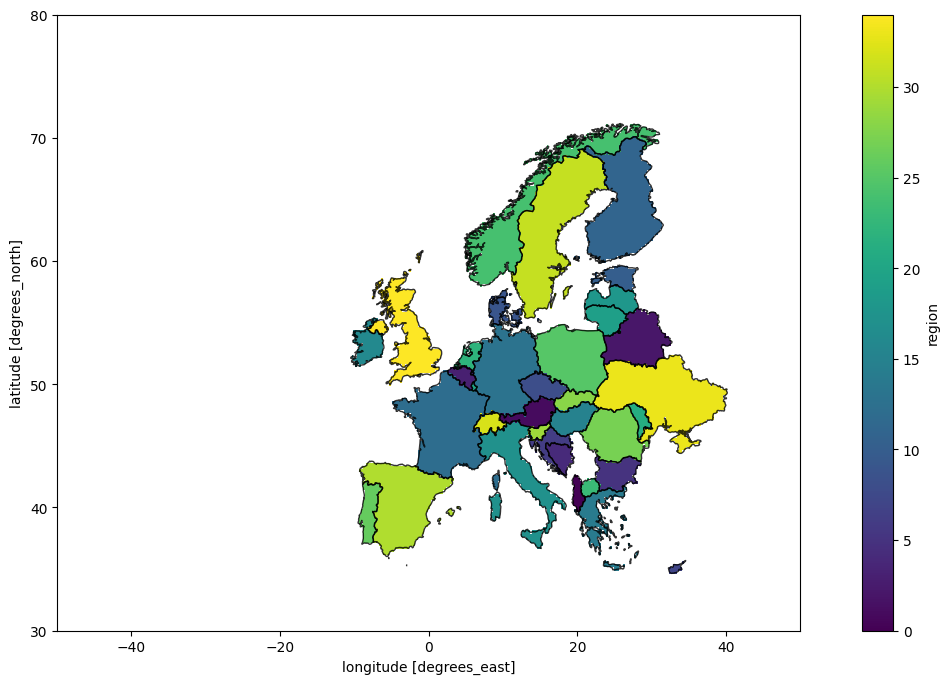

In [11]:
plt.figure(figsize=(16,8))
ax = plt.axes()
mask.plot(ax = ax)
boundaries.plot(ax = ax, alpha = 0.8, facecolor = 'none', lw = 1)
plt.xlim(-50,50)
plt.ylim(30, 80);

In [12]:
import time
'''Collecting all predictors in one df'''

D  = {}
for year in years_era:
    D[year] = pd.DataFrame(columns=['ID', 'country', 't2m', 'tp', 'lnd', 'yld', 'agr', 'gdp'])
for f in file_names_era:
    t1 = time.time()
    name, year = f.split(".")[2], f.split(".")[1]
    if name in ['2m_temperature', 'total_precipitation']:
        if name == '2m_temperature':
            name = 't2m'
            t = 273.15
        else:
            name = 'tp'
            t = 0
        path = join(era_path, year, f)
        data = xr.open_mfdataset(path, chunks = {'time': 10})
        var = [i for i in data.data_vars]
        sub_data = data[var[0]]
        for ID in boundaries.index.tolist():
            sel_mask = mask.where(mask == ID).values
            lat = mask.latitude.values
            lon = mask.longitude.values

            id_lon = lon[np.where(~np.all(np.isnan(sel_mask), axis=0))]
            id_lat = lat[np.where(~np.all(np.isnan(sel_mask), axis=1))]

            piece = sub_data.sel(latitude = slice(id_lat[0], id_lat[-1]), 
                              longitude = slice(id_lon[0], 
                              id_lon[-1])).compute().where(mask == ID)
            
            d = piece.resample(time='1Y').mean(dim='time')-t
            d = np.nanmean(d.values[0])
            D[year].loc[ID, name] = d
            D[year].loc[ID, 'country'] = boundaries.loc[ID, 'COUNTRY']
            D[year].loc[ID, 'ID'] = ID
            D[year].loc[ID, 'lnd'] = lnd[lnd['Country Name']==boundaries.loc[ID, 'COUNTRY']][str(year)].item()
            D[year].loc[ID, 'yld'] = yld[yld['Country Name']==boundaries.loc[ID, 'COUNTRY']][str(year)].item()  
            D[year].loc[ID, 'agr'] = agr[agr['Country Name']==boundaries.loc[ID, 'COUNTRY']][str(year)].item()
            D[year].loc[ID, 'gdp'] = gdp[gdp['Country Name']==boundaries.loc[ID, 'COUNTRY']][str(year)].item()
            print(boundaries.loc[ID, 'COUNTRY'], name,'is processed. Year: ', year)
        data.close()
    D[year].to_csv(f'./final data/{year}.dat', sep = '|')
print(f'Total time: {round((time.time()-t1)/3600, 3)} hours')

Albania t2m is processed. Year:  2005
Austria t2m is processed. Year:  2005
Belarus t2m is processed. Year:  2005
Belgium t2m is processed. Year:  2005
Bosnia and Herzegovina t2m is processed. Year:  2005
Bulgaria t2m is processed. Year:  2005
Croatia t2m is processed. Year:  2005
Cyprus t2m is processed. Year:  2005
Czechia t2m is processed. Year:  2005
Denmark t2m is processed. Year:  2005
Estonia t2m is processed. Year:  2005
Finland t2m is processed. Year:  2005
France t2m is processed. Year:  2005
Germany t2m is processed. Year:  2005
Greece t2m is processed. Year:  2005
Hungary t2m is processed. Year:  2005
Ireland t2m is processed. Year:  2005
Italy t2m is processed. Year:  2005
Latvia t2m is processed. Year:  2005
Lithuania t2m is processed. Year:  2005
Luxembourg t2m is processed. Year:  2005
Moldova t2m is processed. Year:  2005
Netherlands t2m is processed. Year:  2005
North Macedonia t2m is processed. Year:  2005
Norway t2m is processed. Year:  2005
Poland t2m is processed.

Belarus t2m is processed. Year:  2008
Belgium t2m is processed. Year:  2008
Bosnia and Herzegovina t2m is processed. Year:  2008
Bulgaria t2m is processed. Year:  2008
Croatia t2m is processed. Year:  2008
Cyprus t2m is processed. Year:  2008
Czechia t2m is processed. Year:  2008
Denmark t2m is processed. Year:  2008
Estonia t2m is processed. Year:  2008
Finland t2m is processed. Year:  2008
France t2m is processed. Year:  2008
Germany t2m is processed. Year:  2008
Greece t2m is processed. Year:  2008
Hungary t2m is processed. Year:  2008
Ireland t2m is processed. Year:  2008
Italy t2m is processed. Year:  2008
Latvia t2m is processed. Year:  2008
Lithuania t2m is processed. Year:  2008
Luxembourg t2m is processed. Year:  2008
Moldova t2m is processed. Year:  2008
Netherlands t2m is processed. Year:  2008
North Macedonia t2m is processed. Year:  2008
Norway t2m is processed. Year:  2008
Poland t2m is processed. Year:  2008
Portugal t2m is processed. Year:  2008
Romania t2m is processed

Bosnia and Herzegovina t2m is processed. Year:  2011
Bulgaria t2m is processed. Year:  2011
Croatia t2m is processed. Year:  2011
Cyprus t2m is processed. Year:  2011
Czechia t2m is processed. Year:  2011
Denmark t2m is processed. Year:  2011
Estonia t2m is processed. Year:  2011
Finland t2m is processed. Year:  2011
France t2m is processed. Year:  2011
Germany t2m is processed. Year:  2011
Greece t2m is processed. Year:  2011
Hungary t2m is processed. Year:  2011
Ireland t2m is processed. Year:  2011
Italy t2m is processed. Year:  2011
Latvia t2m is processed. Year:  2011
Lithuania t2m is processed. Year:  2011
Luxembourg t2m is processed. Year:  2011
Moldova t2m is processed. Year:  2011
Netherlands t2m is processed. Year:  2011
North Macedonia t2m is processed. Year:  2011
Norway t2m is processed. Year:  2011
Poland t2m is processed. Year:  2011
Portugal t2m is processed. Year:  2011
Romania t2m is processed. Year:  2011
Slovak Republic t2m is processed. Year:  2011
Slovenia t2m is 

Croatia t2m is processed. Year:  2014
Cyprus t2m is processed. Year:  2014
Czechia t2m is processed. Year:  2014
Denmark t2m is processed. Year:  2014
Estonia t2m is processed. Year:  2014
Finland t2m is processed. Year:  2014
France t2m is processed. Year:  2014
Germany t2m is processed. Year:  2014
Greece t2m is processed. Year:  2014
Hungary t2m is processed. Year:  2014
Ireland t2m is processed. Year:  2014
Italy t2m is processed. Year:  2014
Latvia t2m is processed. Year:  2014
Lithuania t2m is processed. Year:  2014
Luxembourg t2m is processed. Year:  2014
Moldova t2m is processed. Year:  2014
Netherlands t2m is processed. Year:  2014
North Macedonia t2m is processed. Year:  2014
Norway t2m is processed. Year:  2014
Poland t2m is processed. Year:  2014
Portugal t2m is processed. Year:  2014
Romania t2m is processed. Year:  2014
Slovak Republic t2m is processed. Year:  2014
Slovenia t2m is processed. Year:  2014
Spain t2m is processed. Year:  2014
Sweden t2m is processed. Year:  2

Czechia t2m is processed. Year:  2017
Denmark t2m is processed. Year:  2017
Estonia t2m is processed. Year:  2017
Finland t2m is processed. Year:  2017
France t2m is processed. Year:  2017
Germany t2m is processed. Year:  2017
Greece t2m is processed. Year:  2017
Hungary t2m is processed. Year:  2017
Ireland t2m is processed. Year:  2017
Italy t2m is processed. Year:  2017
Latvia t2m is processed. Year:  2017
Lithuania t2m is processed. Year:  2017
Luxembourg t2m is processed. Year:  2017
Moldova t2m is processed. Year:  2017
Netherlands t2m is processed. Year:  2017
North Macedonia t2m is processed. Year:  2017
Norway t2m is processed. Year:  2017
Poland t2m is processed. Year:  2017
Portugal t2m is processed. Year:  2017
Romania t2m is processed. Year:  2017
Slovak Republic t2m is processed. Year:  2017
Slovenia t2m is processed. Year:  2017
Spain t2m is processed. Year:  2017
Sweden t2m is processed. Year:  2017
Switzerland t2m is processed. Year:  2017
Ukraine t2m is processed. Yea

Estonia t2m is processed. Year:  2020
Finland t2m is processed. Year:  2020
France t2m is processed. Year:  2020
Germany t2m is processed. Year:  2020
Greece t2m is processed. Year:  2020
Hungary t2m is processed. Year:  2020
Ireland t2m is processed. Year:  2020
Italy t2m is processed. Year:  2020
Latvia t2m is processed. Year:  2020
Lithuania t2m is processed. Year:  2020
Luxembourg t2m is processed. Year:  2020
Moldova t2m is processed. Year:  2020
Netherlands t2m is processed. Year:  2020
North Macedonia t2m is processed. Year:  2020
Norway t2m is processed. Year:  2020
Poland t2m is processed. Year:  2020
Portugal t2m is processed. Year:  2020
Romania t2m is processed. Year:  2020
Slovak Republic t2m is processed. Year:  2020
Slovenia t2m is processed. Year:  2020
Spain t2m is processed. Year:  2020
Sweden t2m is processed. Year:  2020
Switzerland t2m is processed. Year:  2020
Ukraine t2m is processed. Year:  2020
United Kingdom t2m is processed. Year:  2020
Albania tp is processe

In [13]:
list_of_countries = boundaries['COUNTRY'].tolist()
summary = []
T2Ms, TPs, LNDs, YLDs, AGRs, GDPs, = [], [], [], [], [], []
for country in list_of_countries:
    for year in years_era:
        tp = D[year][D[year]['country'] == country]['tp']
        t2m = D[year][D[year]['country'] == country]['t2m']
    summary[country]['t2m'] = T2Ms
    summary[country]['tp'] = TPs
    summary[country]['lnd'] = LNDs
    summary[country]['yld'] = YLDs
    summary[country]['agr'] = AGRs
    summary[country]['gdp'] = GDPs
    T2Ms, TPs, LNDs, YLDs, AGRs, GDPs, = [], [], [], [], [], []

In [ ]:
D['2000'][D['2000']['country'] == country]